<a href="https://colab.research.google.com/github/Jaskirat1/AIT_SVM_projects/blob/main/Heart_diease_prediction_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
corr = df.corr()
corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [7]:
corr.style\
    .background_gradient(cmap = 'bwr')\
    .set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.00,0.25,-0.10,0.20,-0.38,0.26,0.28
RestingBP,0.25,1.00,0.10,0.07,-0.11,0.16,0.11
Cholesterol,-0.10,0.10,1.00,-0.26,0.24,0.05,-0.23
FastingBS,0.20,0.07,-0.26,1.00,-0.13,0.05,0.27
MaxHR,-0.38,-0.11,0.24,-0.13,1.00,-0.16,-0.40
Oldpeak,0.26,0.16,0.05,0.05,-0.16,1.00,0.40
HeartDisease,0.28,0.11,-0.23,0.27,-0.40,0.40,1.00


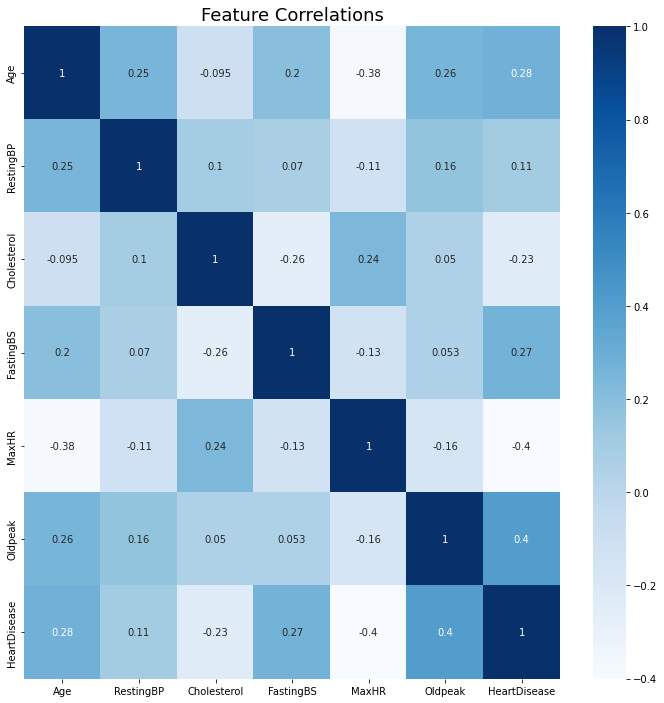

In [10]:
plt.figure(figsize= (12,12))
plt.title('Feature Correlations', fontsize = 18)
sns.heatmap(corr, annot = True, cmap='Blues')

Variance Inflation Factor

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [12]:
vif = pd.DataFrame()

In [14]:
numeric_data = df.select_dtypes(['number'])

In [15]:
numeric_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [16]:
vif['features'] = numeric_data.columns

In [19]:
vif['features'].head()

0            Age
1      RestingBP
2    Cholesterol
3      FastingBS
4          MaxHR
Name: features, dtype: object

In [20]:
vif['features']

0             Age
1       RestingBP
2     Cholesterol
3       FastingBS
4           MaxHR
5         Oldpeak
6    HeartDisease
Name: features, dtype: object

In [17]:
vif['VIF'] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]

In [21]:
vif['VIF']

0    30.462968
1    43.070748
2     5.106418
3     1.500987
4    20.458949
5     2.122029
6     3.222266
Name: VIF, dtype: float64

In [23]:
print(vif)

       features        VIF
0           Age  30.462968
1     RestingBP  43.070748
2   Cholesterol   5.106418
3     FastingBS   1.500987
4         MaxHR  20.458949
5       Oldpeak   2.122029
6  HeartDisease   3.222266


In [24]:
#The restingBP, Age, and MaxHR have VIF big value. It is showing that there are colinearity in those 3 features. Therefore, we drop the biggest VIF (RestingBP) then calculate again the VIF.



In [25]:
numeric_data = numeric_data.drop('RestingBP',axis = 1)

In [26]:
numeric_data

,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,289,0,172,0.0,0
1,49,180,0,156,1.0,1
2,37,283,0,98,0.0,0
3,48,214,0,108,1.5,1
4,54,195,0,122,0.0,0
...,...,...,...,...,...,...
913,45,264,0,132,1.2,1
914,68,193,1,141,3.4,1
915,57,131,0,115,1.2,1
916,57,236,0,174,0.0,1


In [27]:
vif.drop(vif.index, inplace = True)
vif['features'] = numeric_data.columns
vif['VIF'] = [variance_inflation_factor(numeric_data.values, i ) for i in range(numeric_data.shape[1])]


In [28]:
vif

,features,VIF
0,Age,17.294587
1,Cholesterol,4.960139
2,FastingBS,1.500343
3,MaxHR,14.889208
4,Oldpeak,2.121690
5,HeartDisease,3.151320


In [29]:
numeric_data = numeric_data.drop('Age', axis = 1)


In [30]:
vif.drop(vif.index, inplace = True)

In [31]:
vif['features'] = numeric_data.columns

In [32]:
vif['VIF'] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]

In [33]:
vif

,features,VIF
0,Cholesterol,4.846509
1,FastingBS,1.455528
2,MaxHR,6.048800
3,Oldpeak,2.077846
4,HeartDisease,2.651516


In [34]:
df= df.drop(['Age', 'RestingBP'], axis = 1)
df

,Sex,ChestPainType,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,M,ATA,289,0,Normal,172,N,0.0,Up,0
1,F,NAP,180,0,Normal,156,N,1.0,Flat,1
2,M,ATA,283,0,ST,98,N,0.0,Up,0
3,F,ASY,214,0,Normal,108,Y,1.5,Flat,1
4,M,NAP,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...
913,M,TA,264,0,Normal,132,N,1.2,Flat,1
914,M,ASY,193,1,Normal,141,N,3.4,Flat,1
915,M,ASY,131,0,Normal,115,Y,1.2,Flat,1
916,F,ATA,236,0,LVH,174,N,0.0,Flat,1


Encoding Categorical Features

In [36]:
df.select_dtypes(exclude = 'number').nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
model = LabelEncoder()

In [39]:
df['Sex'] = model.fit_transform(df['Sex'])
df['ExerciseAngina'] = model.fit_transform(df['ExerciseAngina'])

In [40]:
df

,Sex,ChestPainType,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,ATA,289,0,Normal,172,0,0.0,Up,0
1,0,NAP,180,0,Normal,156,0,1.0,Flat,1
2,1,ATA,283,0,ST,98,0,0.0,Up,0
3,0,ASY,214,0,Normal,108,1,1.5,Flat,1
4,1,NAP,195,0,Normal,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...
913,1,TA,264,0,Normal,132,0,1.2,Flat,1
914,1,ASY,193,1,Normal,141,0,3.4,Flat,1
915,1,ASY,131,0,Normal,115,1,1.2,Flat,1
916,0,ATA,236,0,LVH,174,0,0.0,Flat,1


In [41]:
#Encoded Sex to 1 ---> Male 
#               0 ---> Female

In [42]:
df = pd.get_dummies(df, drop_first=False)

In [43]:
df

,Sex,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,1,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,0,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,1,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,0,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,1,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
914,1,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
915,1,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
916,0,236,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0


Dataset Recording

In [44]:
heart_dis = df['HeartDisease']


In [46]:
df = df.drop('HeartDisease', axis = 1)


In [47]:
df.insert(loc = len(df.columns), column = 'HeartDisease', value = heart_dis)

In [48]:
df

,Sex,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,1,289,0,172,0,0.0,0,1,0,0,0,1,0,0,0,1,0
1,0,180,0,156,0,1.0,0,0,1,0,0,1,0,0,1,0,1
2,1,283,0,98,0,0.0,0,1,0,0,0,0,1,0,0,1,0
3,0,214,0,108,1,1.5,1,0,0,0,0,1,0,0,1,0,1
4,1,195,0,122,0,0.0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,1,264,0,132,0,1.2,0,0,0,1,0,1,0,0,1,0,1
914,1,193,1,141,0,3.4,1,0,0,0,0,1,0,0,1,0,1
915,1,131,0,115,1,1.2,1,0,0,0,0,1,0,0,1,0,1
916,0,236,0,174,0,0.0,0,1,0,0,1,0,0,0,1,0,1


Data Preprocessing

In [49]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [50]:
print(x)

[[  1. 289.   0. ...   0.   0.   1.]
 [  0. 180.   0. ...   0.   1.   0.]
 [  1. 283.   0. ...   0.   0.   1.]
 ...
 [  1. 131.   0. ...   0.   1.   0.]
 [  0. 236.   0. ...   0.   1.   0.]
 [  1. 175.   0. ...   0.   0.   1.]]


In [51]:
x.shape

(918, 16)

In [52]:
y.shape

(918,)

In [53]:
print(y)

[0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 

Separated the training Set and test set

In [55]:
from sklearn.model_selection import train_test_split


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

In [57]:
print(x_train)

[[  1. 458.   1. ...   1.   0.   0.]
 [  1. 321.   0. ...   0.   0.   1.]
 [  0. 283.   1. ...   0.   0.   1.]
 ...
 [  1. 203.   0. ...   0.   1.   0.]
 [  1. 198.   0. ...   0.   1.   0.]
 [  1. 267.   0. ...   0.   1.   0.]]


In [58]:
print(y_train)

[0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0
 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1
 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0
 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0
 1 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1
 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1
 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1
 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0
 0 1 1 1 0 1 1 1 0 0 0 1 

In [59]:
print('Shape of x_train:',x_train.shape)
print('Shape of x_train:',y_train.shape)
print('Shape of x_train:',x_test.shape)
print('Shape of x_train:',y_test.shape)

Shape of x_train: (688, 16)
Shape of x_train: (688,)
Shape of x_train: (230, 16)
Shape of x_train: (230,)


Scaling the Training Set

In [60]:
from sklearn.preprocessing import StandardScaler


In [61]:
model = StandardScaler()

In [63]:
x_train = model.fit_transform(x_train)
x_test = model.transform(x_test)

In [64]:
print(x_train)

[[ 0.52352084  2.4030476   1.84668796 ...  3.53414715 -1.01759666
  -0.84599688]
 [ 0.52352084  1.12848987 -0.54151    ... -0.2829537  -1.01759666
   1.18203745]
 [-1.91014362  0.77496291  1.84668796 ... -0.2829537  -1.01759666
   1.18203745]
 ...
 [ 0.52352084  0.03069562 -0.54151    ... -0.2829537   0.98270763
  -0.84599688]
 [ 0.52352084 -0.01582109 -0.54151    ... -0.2829537   0.98270763
  -0.84599688]
 [ 0.52352084  0.62610945 -0.54151    ... -0.2829537   0.98270763
  -0.84599688]]


In [67]:
x_test = model.transform(x_test)

In [68]:
x_test

array([[ 1.00000000e+00,  3.69000000e+02,  5.34456200e-16, ...,
        -1.68243972e-15,  1.00000000e+00, -1.59433190e-16],
       [ 1.00000000e+00,  2.16000000e+02,  5.34456200e-16, ...,
        -1.68243972e-15,  3.71150139e-16,  1.00000000e+00],
       [ 1.00000000e+00,  2.88000000e+02,  5.34456200e-16, ...,
        -1.68243972e-15,  1.00000000e+00, -1.59433190e-16],
       ...,
       [ 1.00000000e+00,  2.19000000e+02,  5.34456200e-16, ...,
        -1.68243972e-15,  1.00000000e+00, -1.59433190e-16],
       [-4.28597726e-16,  2.27000000e+02,  5.34456200e-16, ...,
        -1.68243972e-15,  1.00000000e+00, -1.59433190e-16],
       [-4.28597726e-16,  2.30000000e+02,  5.34456200e-16, ...,
        -1.68243972e-15,  3.71150139e-16,  1.00000000e+00]])

Classification Model using SVM with kernael RBF

In [69]:
from sklearn.svm import SVC

In [72]:
classifier_model = SVC(kernel = 'rbf', random_state= 2)
classifier_model.fit(x_train, y_train)

SVC(random_state=2)

Predicting the Test Set Result

In [74]:
y_pred = classifier_model.predict(x_test)

In [76]:
result_np = np.concatenate((y_pred.reshape(len(y_pred), 1), (y_test.reshape(len(y_test), 1))), 1)


In [77]:
result = pd.DataFrame(result_np, columns = ['Prediction', 'Real_value'])

In [78]:
result

,Prediction,Real_value
0,1,1
1,1,0
2,1,1
3,1,1
4,1,1
...,...,...
225,1,1
226,1,0
227,1,1
228,1,0


Measuring the Model Accuracy

In [80]:
from sklearn.metrics import classification_report


In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       104
           1       0.55      1.00      0.71       126

    accuracy                           0.55       230
   macro avg       0.27      0.50      0.35       230
weighted avg       0.30      0.55      0.39       230



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
from sklearn.model_selection import cross_val_score

In [86]:
val_score = cross_val_score(estimator=classifier_model, X = x_train, y=y_train, cv = 10)

In [89]:
print('Accuracy: {:.2f} %'. format(val_score.mean()*100))
print('Standard DeviationL: {:.2f} % '. format(val_score.std()*100))

Accuracy: 86.06 %
Standard DeviationL: 2.96 % 
